In [1]:
%config InlineBackend.figure_format ='retina'
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import pandas as pd
import numpy as np
import os

import sys

sys.path.insert(0, '../')

from global_config import config

results_dir   = config.get_property('results_dir')
data_dir      = config.get_property('data_dir')
import seaborn as sns

#%% Plot Tong's default setting
SMALL_SIZE  = 22
MEDIUM_SIZE = 22
BIGGER_SIZE = 22

plt.rc('font',   size=SMALL_SIZE, family='sans-serif', serif='Arial')          # controls default text sizes
plt.rc('axes',   titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes',   labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize=SMALL_SIZE)   # fontsize of the tick labels"
plt.rc('ytick',  labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text')


In [4]:
os.listdir(os.path.join(results_dir, "forecast", "evaluation"))

['forecasts.csv',
 'BD_weights_KPast.csv',
 'BD_scores_all_past.csv',
 'BD_scores_equal_weights.csv',
 'scores_K_past.csv',
 'scores_all_past.csv',
 'scores.csv',
 'weights_AllPast.csv',
 'weights_KPast.csv',
 'scores_equal_weights.csv',
 'BD_forecasts.csv',
 'BD_scores_K_past.csv',
 'BD_scores.csv',
 'BD_weights_AllPast.csv']

In [6]:
model2name                  = {}
model2name["arima"]        = "ARIMA"
model2name["sarima"]       = "SARIMA"
model2name["eakf_model1"]  = "Model 1"
model2name["eakf_model2"]  = "Model 2"
model2name["eakf_model3"]  = "Model 3"

forecast_horizon = ['1m', '2m', '3m', '4m', '5m', '6m']

weights_df                   = pd.read_csv(os.path.join(results_dir, "forecast", "evaluation", "BD_weights_AllPast.csv"), parse_dates=['date_forecast'])
weights_df["model_name_plt"] = weights_df.model_name.apply(lambda x: model2name[x])
weights_df["date_plot"]      = weights_df.date_forecast.apply(lambda x: x.strftime("%Y-%m-%d"))

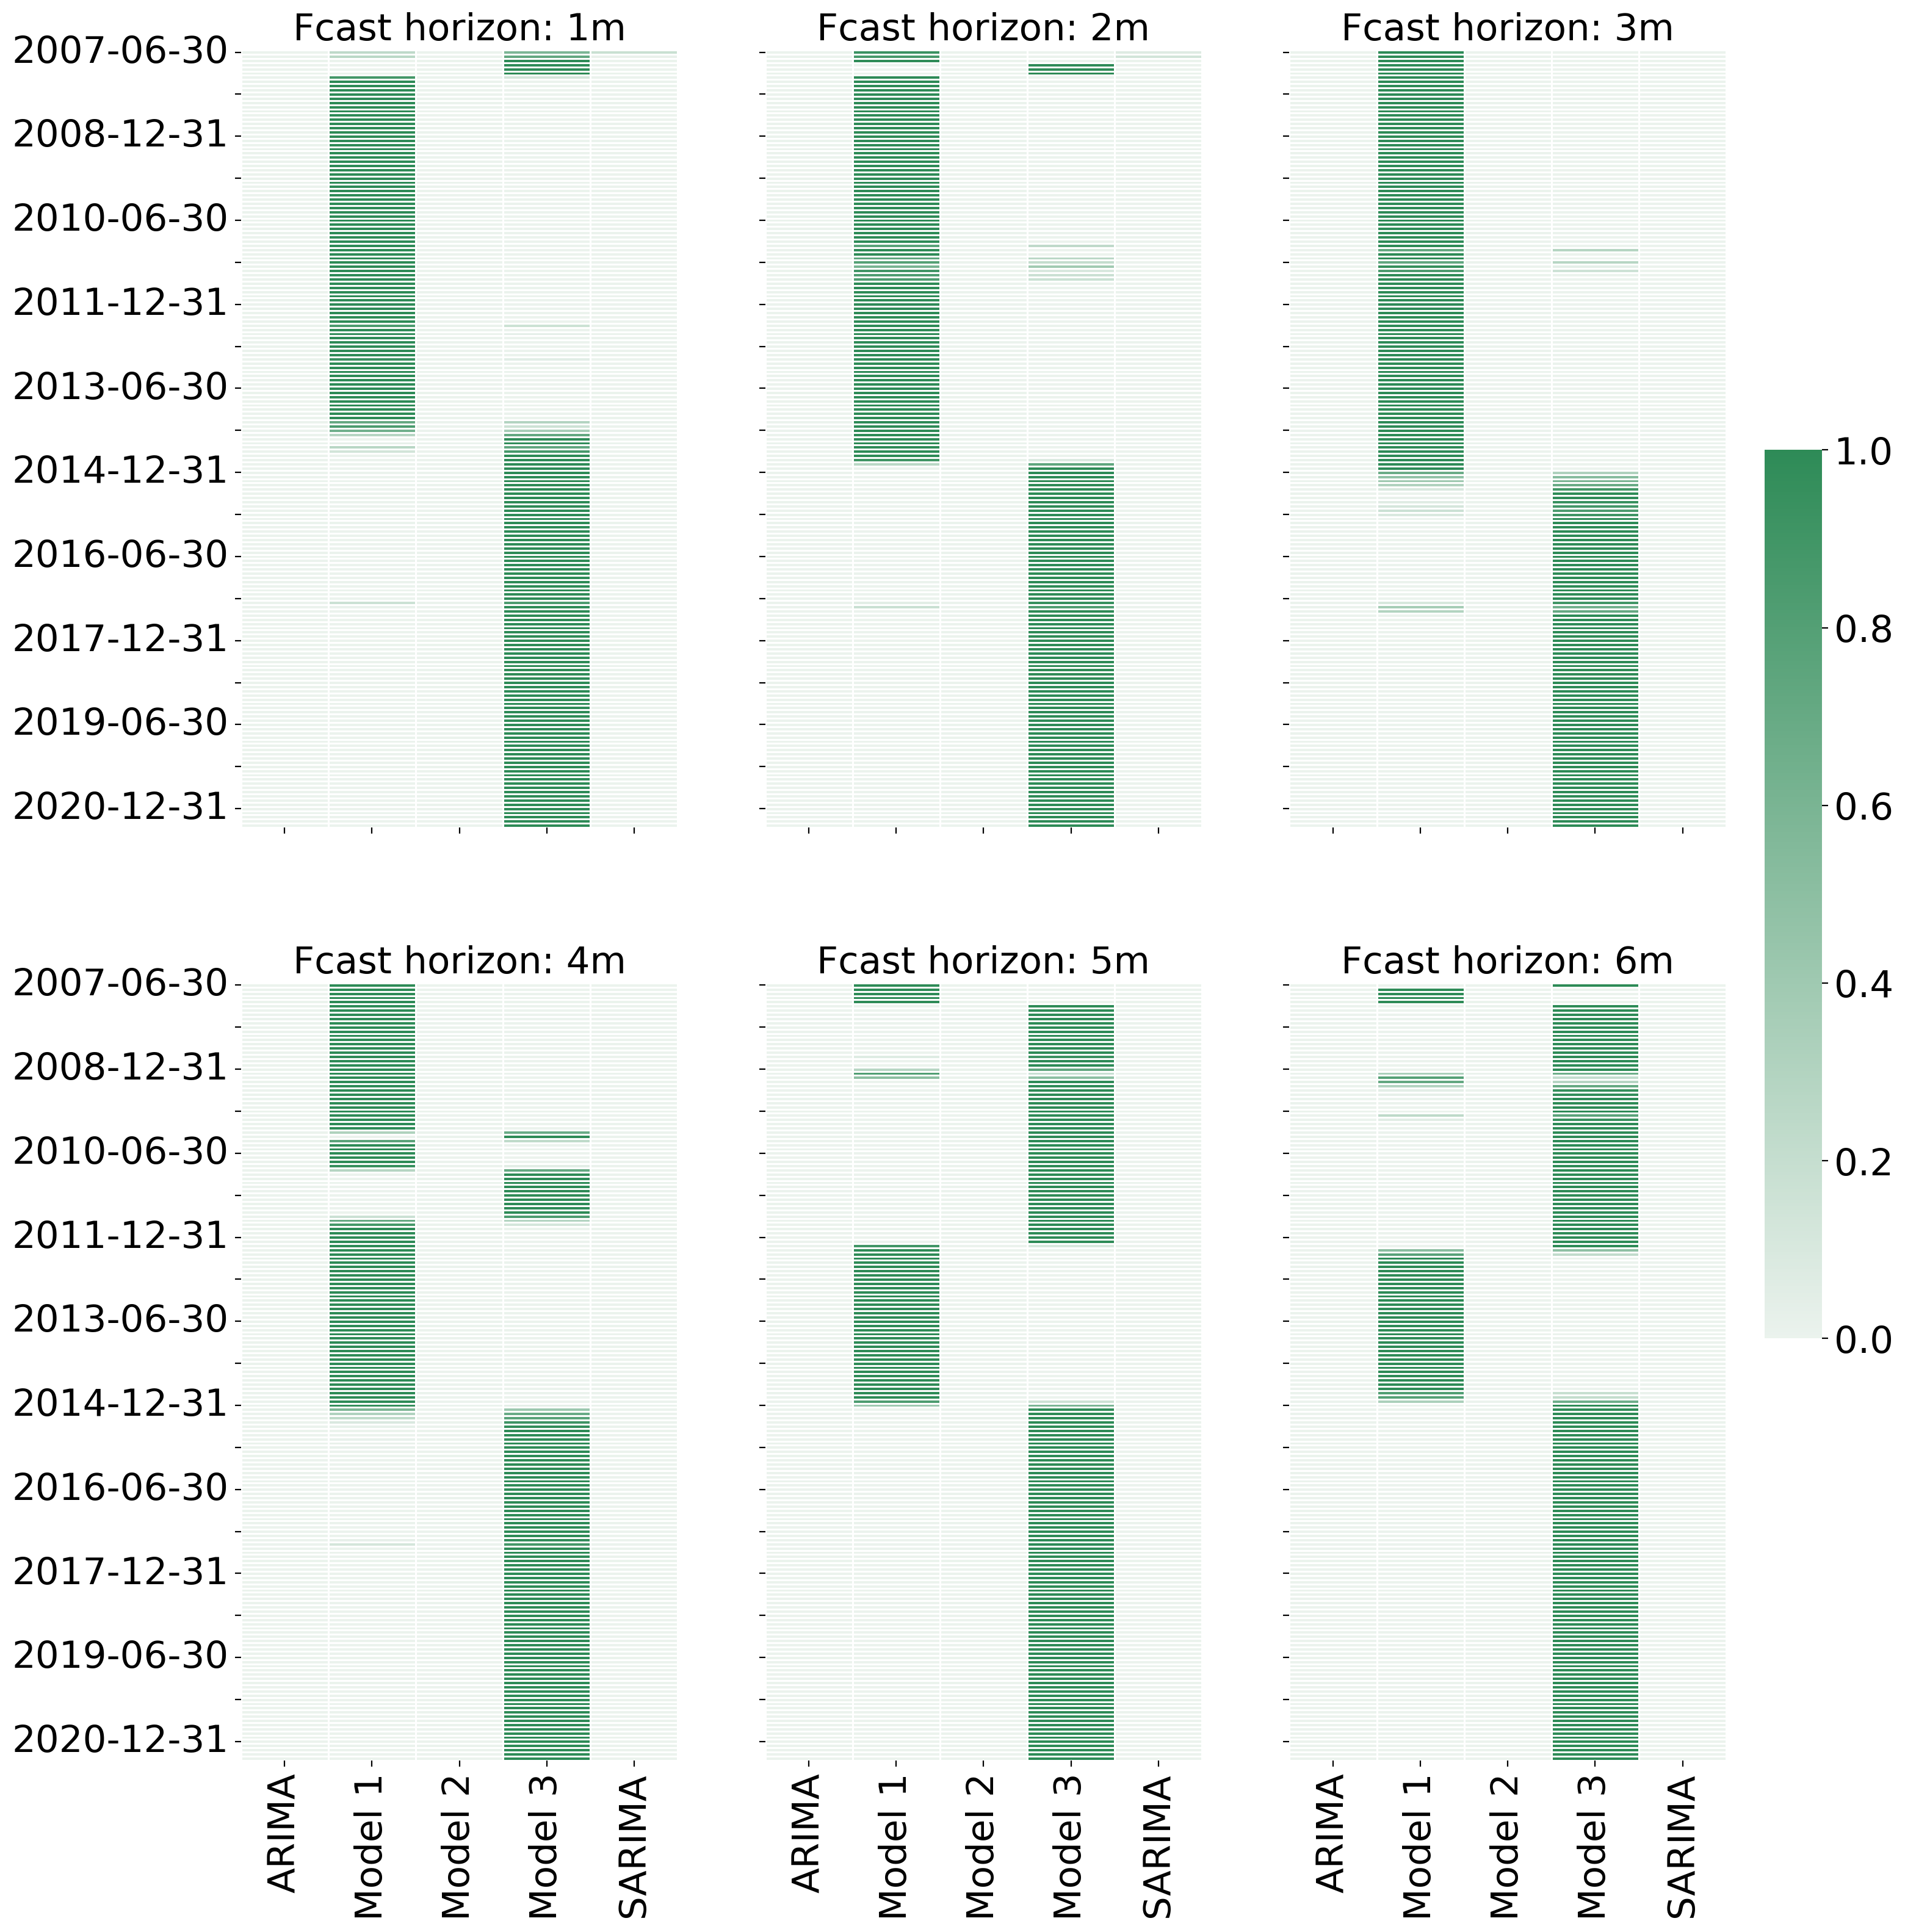

In [7]:
cmap    = sns.light_palette("seagreen", as_cmap=True, reverse=False)

fig, ax = plt.subplots(2, 3, figsize=(15.7, 18.2), sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.92, .3, .03, .4])
for idx_axi, axi in enumerate(ax.flatten()):
    w_df    = weights_df[weights_df.forecast_window==forecast_horizon[idx_axi]]
    w_hm_df = w_df.pivot(index='model_name_plt', columns='date_plot', values='weigth')

    if idx_axi==0:
        sns.heatmap(ax=axi, data=w_hm_df.T, cmap=cmap, vmin=0, vmax=1, linewidths=.5, cbar_ax=cbar_ax)
    else:
        sns.heatmap(ax=axi, data=w_hm_df.T, cmap=cmap, vmin=0, vmax=1, linewidths=.5, cbar_ax=None, cbar=None)
    axi.set_title("Fcast horizon: {}".format(forecast_horizon[idx_axi]))
    axi.set_xlabel(None)
    axi.set_ylabel(None)

    ytickpos  = [0.5, 9.5, 18.5, 27.5, 36.5, 45.5, 54.5, 63.5, 72.5, 81.5, 90.5, 99.5, 108.5, 117.5, 126.5, 135.5, 144.5, 153.5, 162.5]
    yticklabl = ['2007-06-30','','2008-12-31','','2010-06-30','','2011-12-31','','2013-06-30','','2014-12-31','','2016-06-30','','2017-12-31','','2019-06-30','','2020-12-31']
    axi.set_yticklabels(yticklabl)

fig.savefig(os.path.join(results_dir, "figures", "reviews", "ensemble", f"weights_AllPast_different_eval_horizon.png"), dpi=300, transparent=True)


In [10]:
weights_df                   = pd.read_csv(os.path.join(results_dir, "forecast", "evaluation", "BD_weights_KPast.csv"), parse_dates=['date_forecast'])
weights_df["model_name_plt"] = weights_df.model_name.apply(lambda x: model2name[x])
weights_df["date_plot"]      = weights_df.date_forecast.apply(lambda x: x.strftime("%Y-%m-%d"))
past_points_use              = [2, 3, 4, 5, 6]


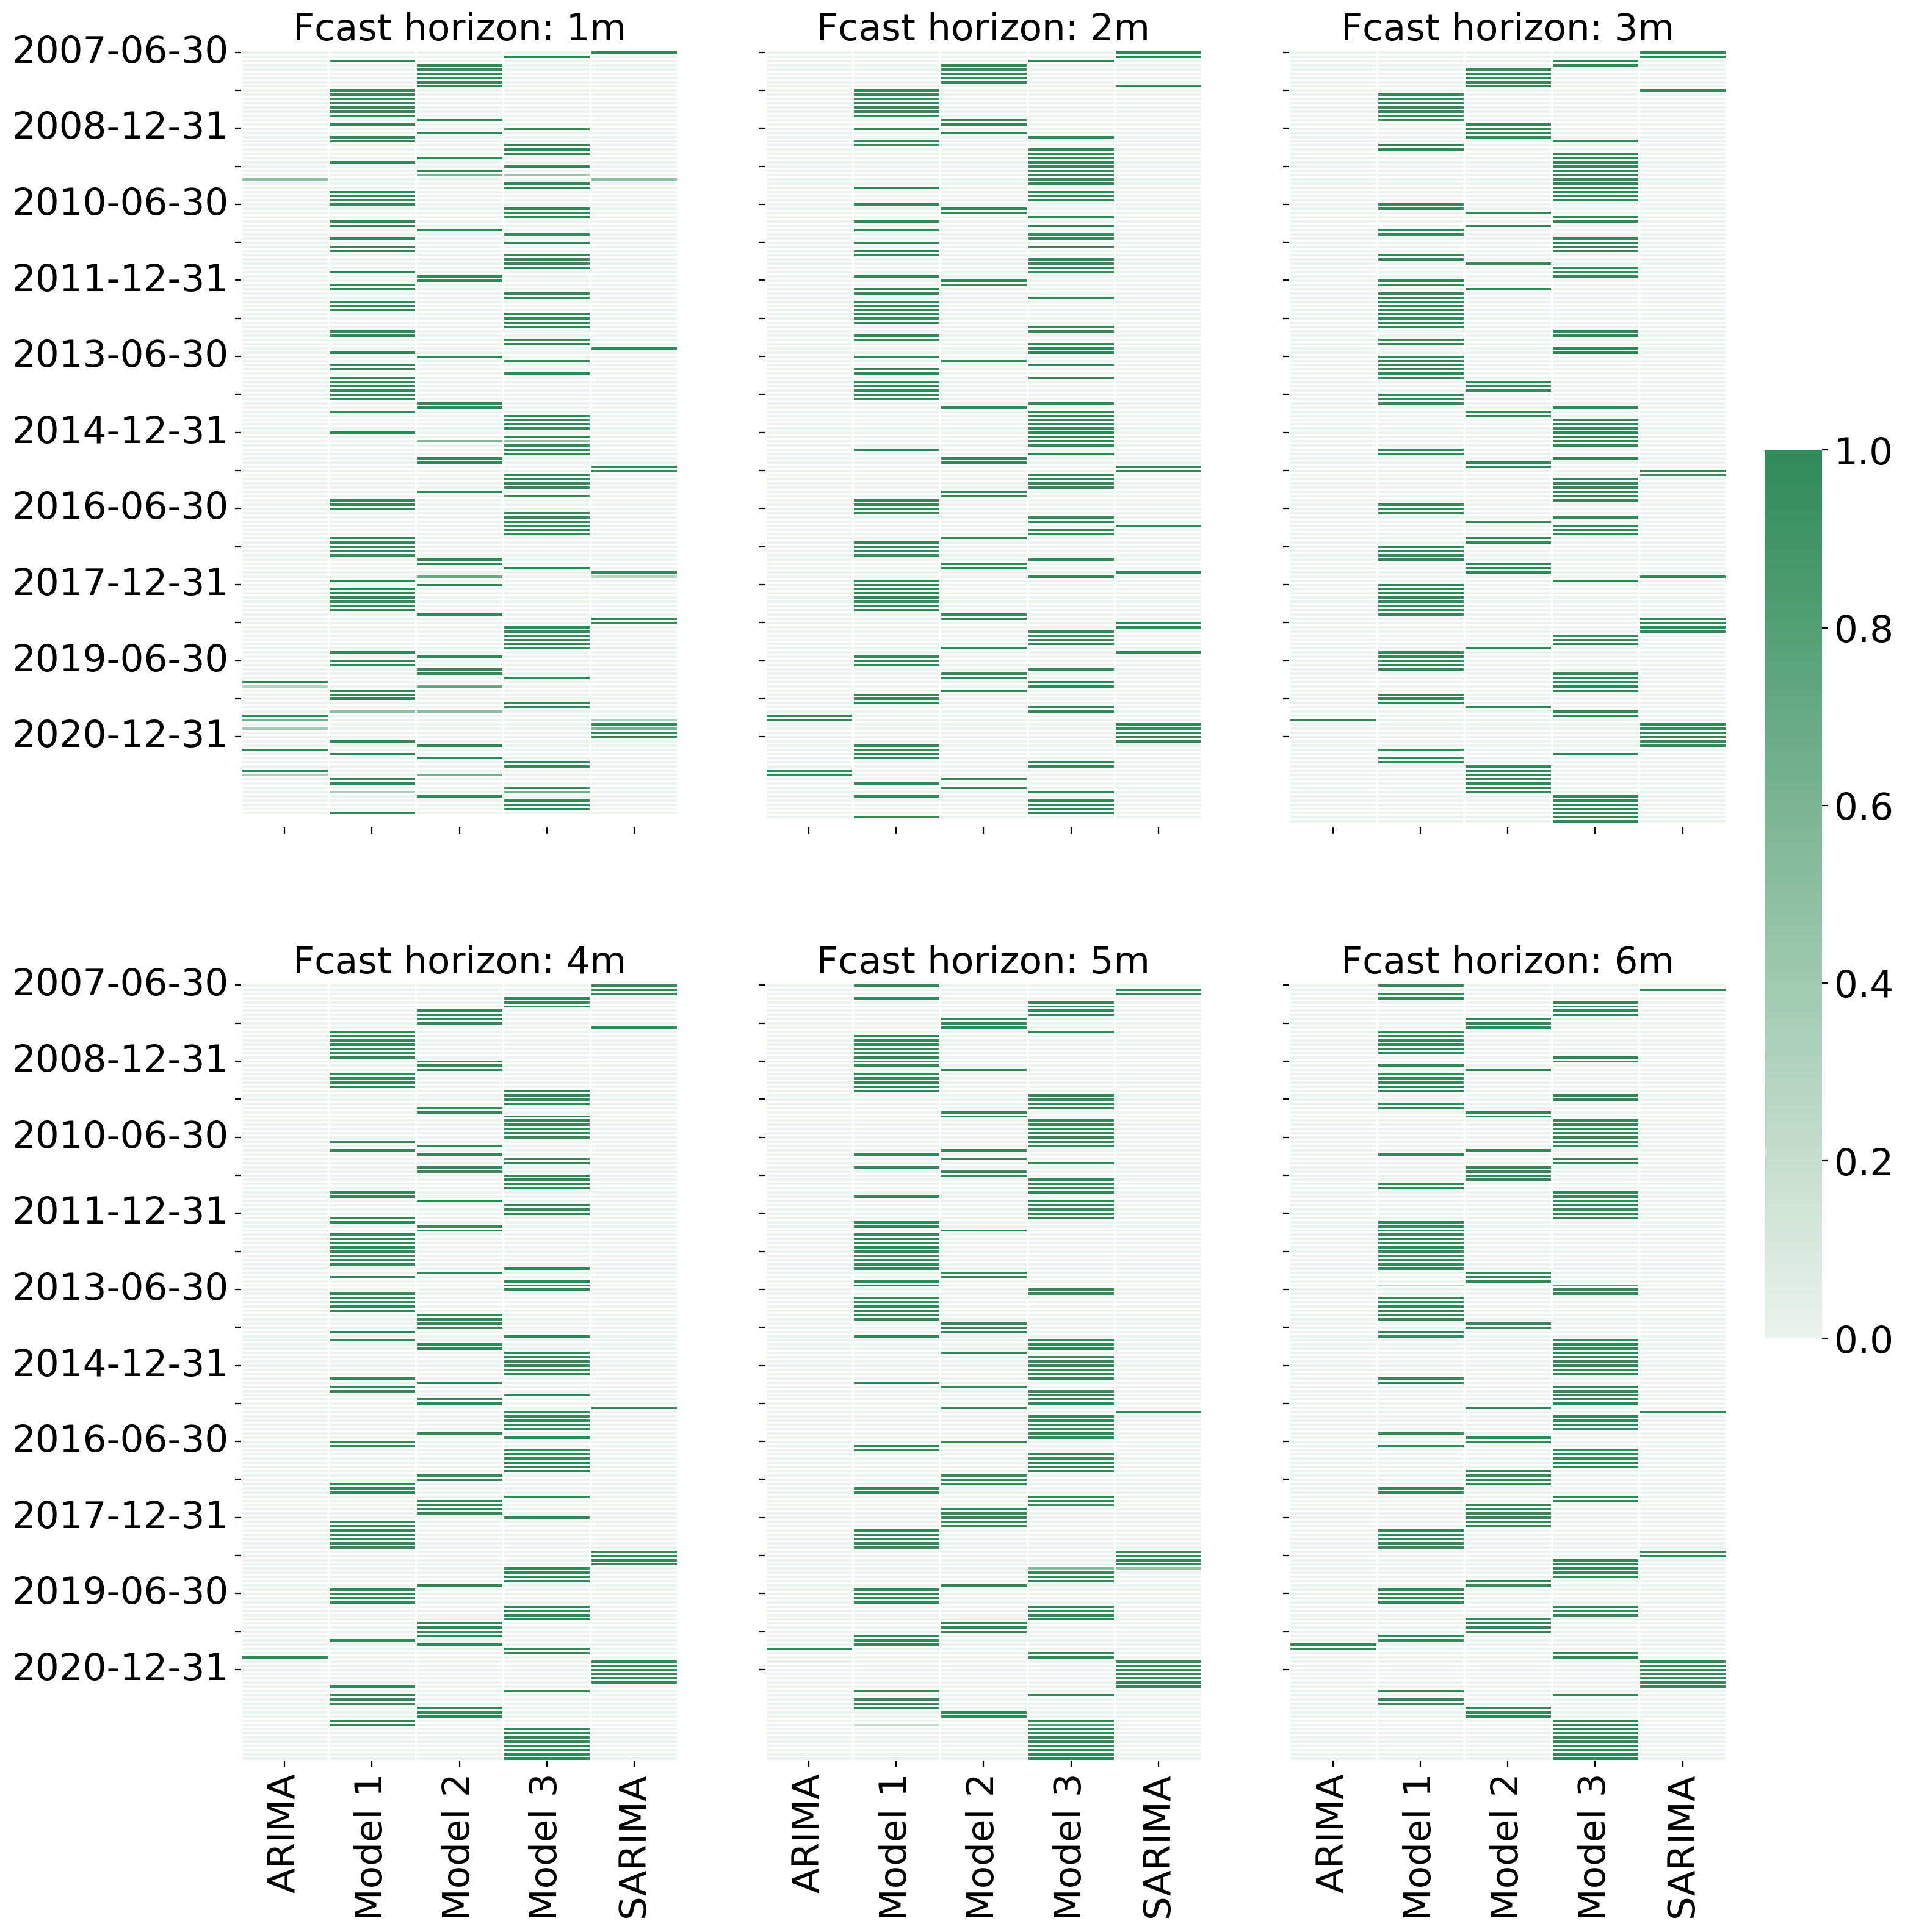

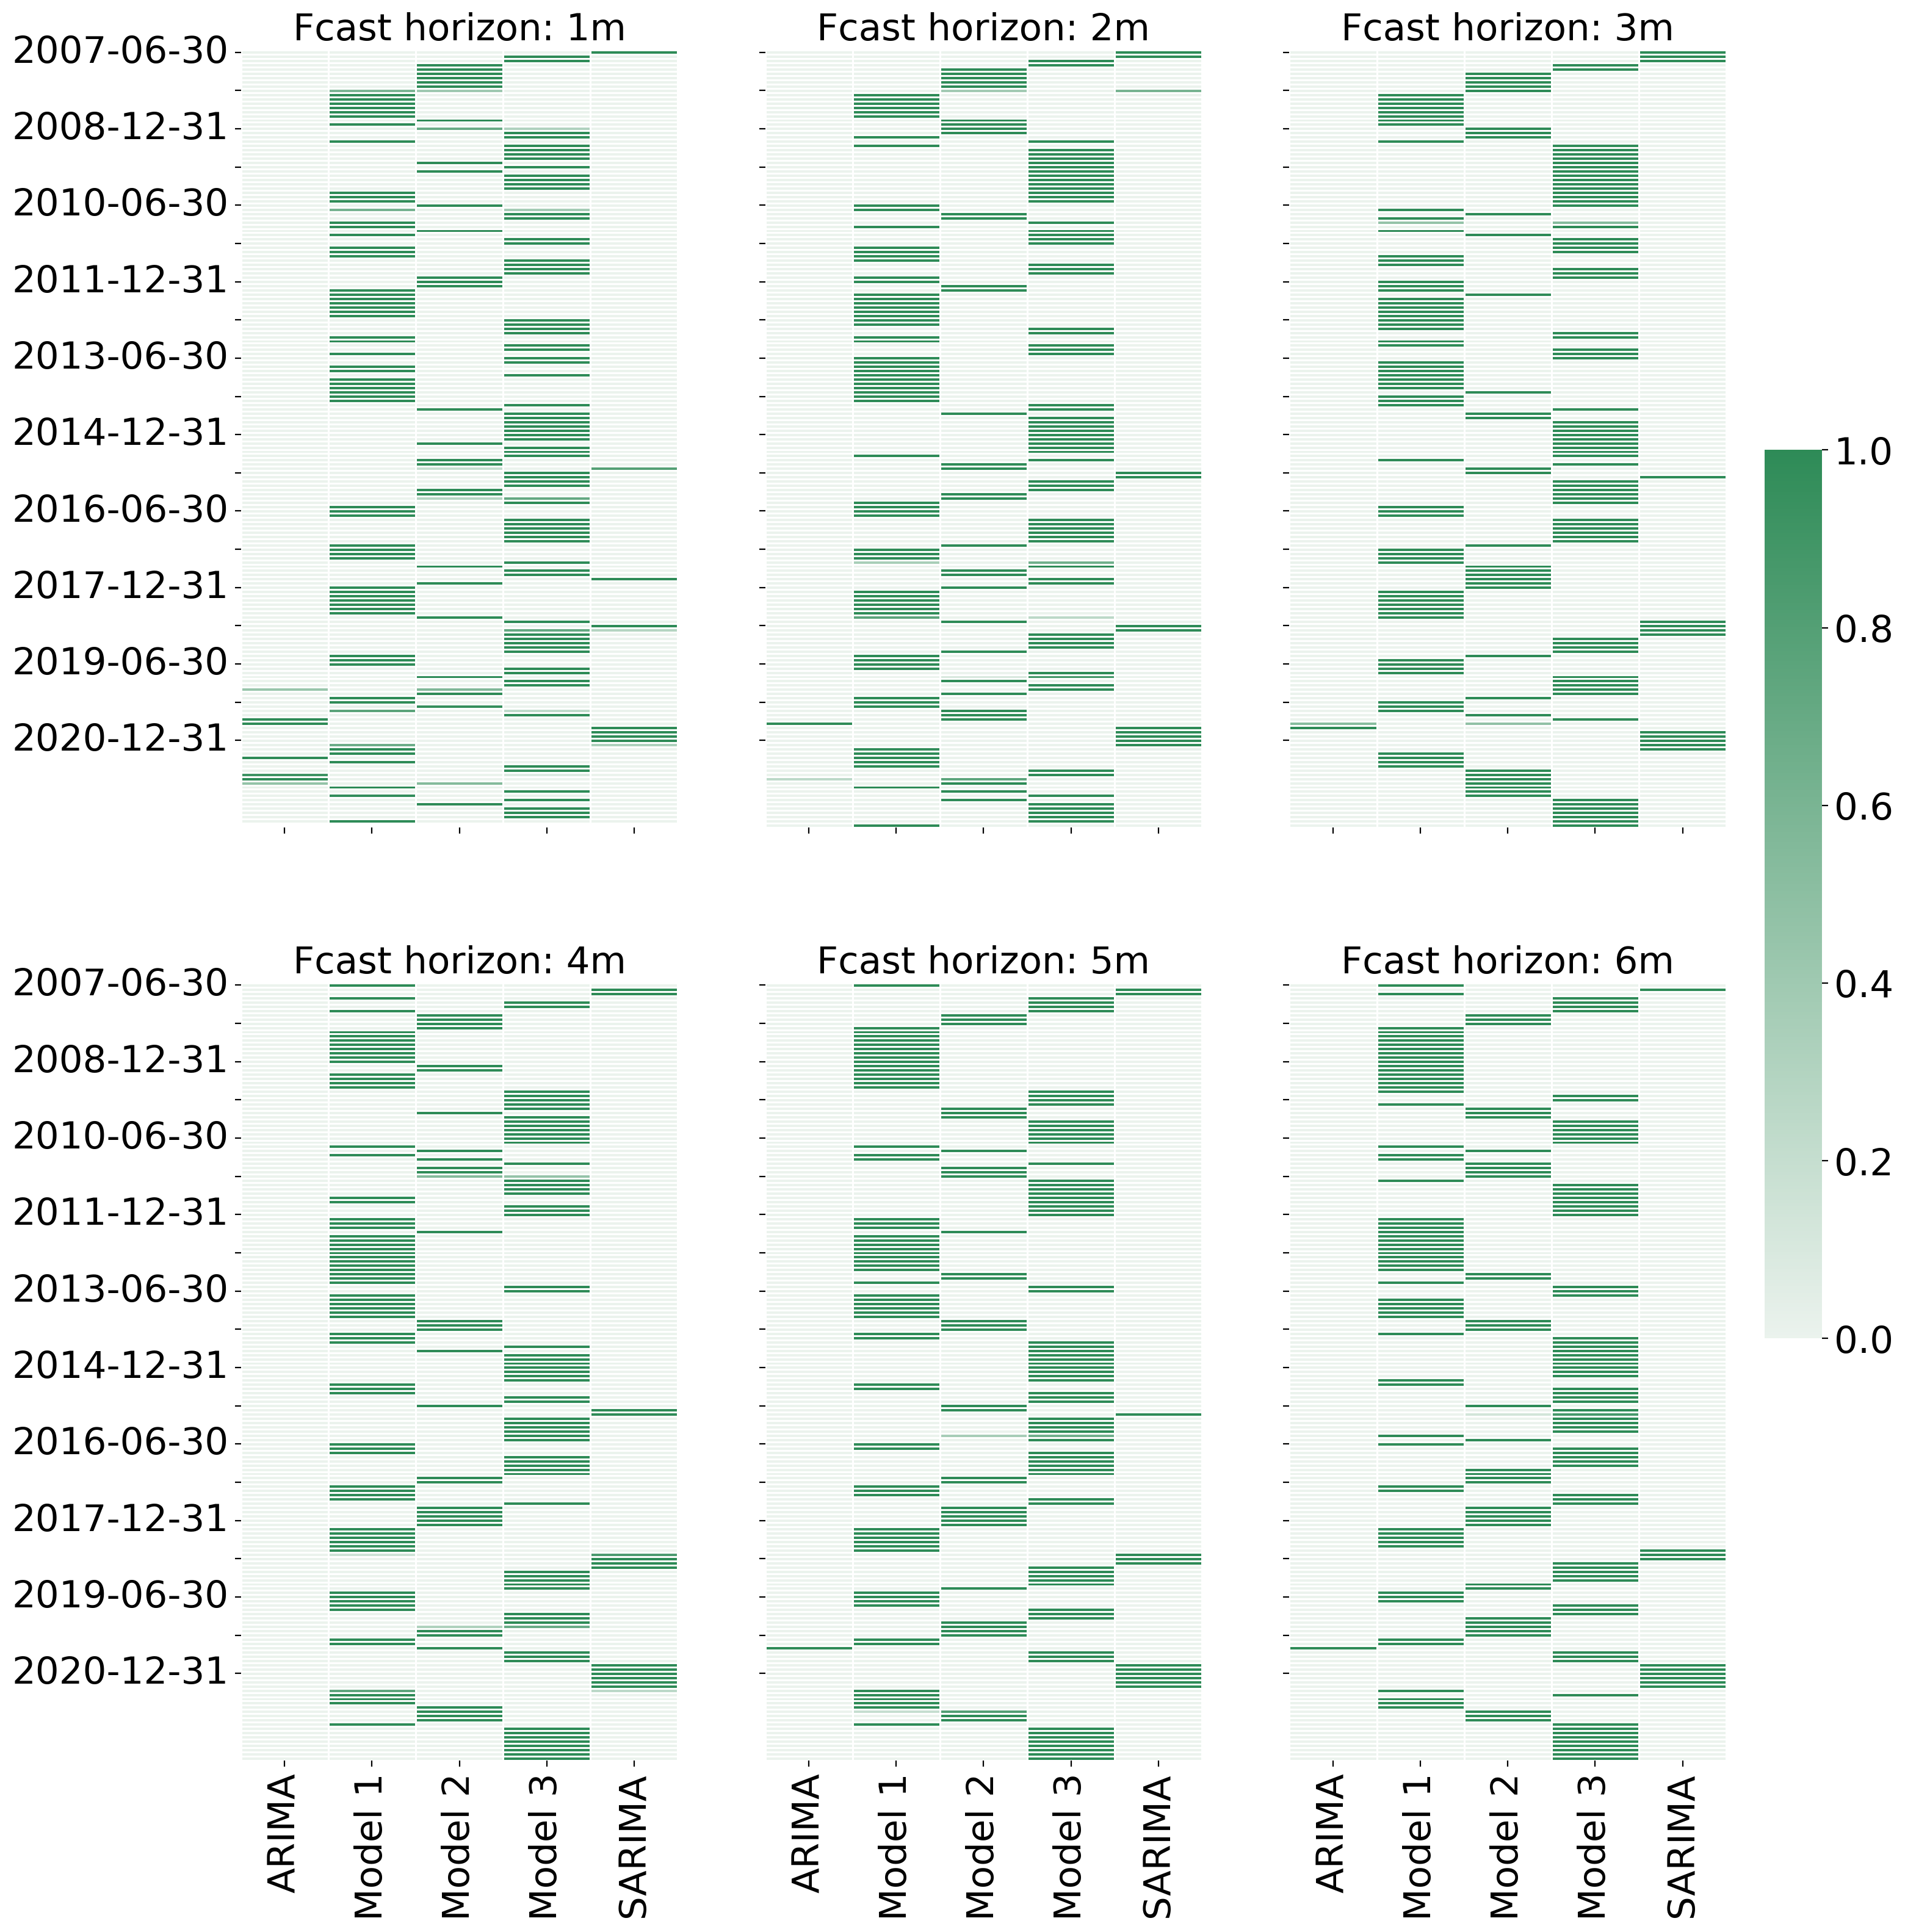

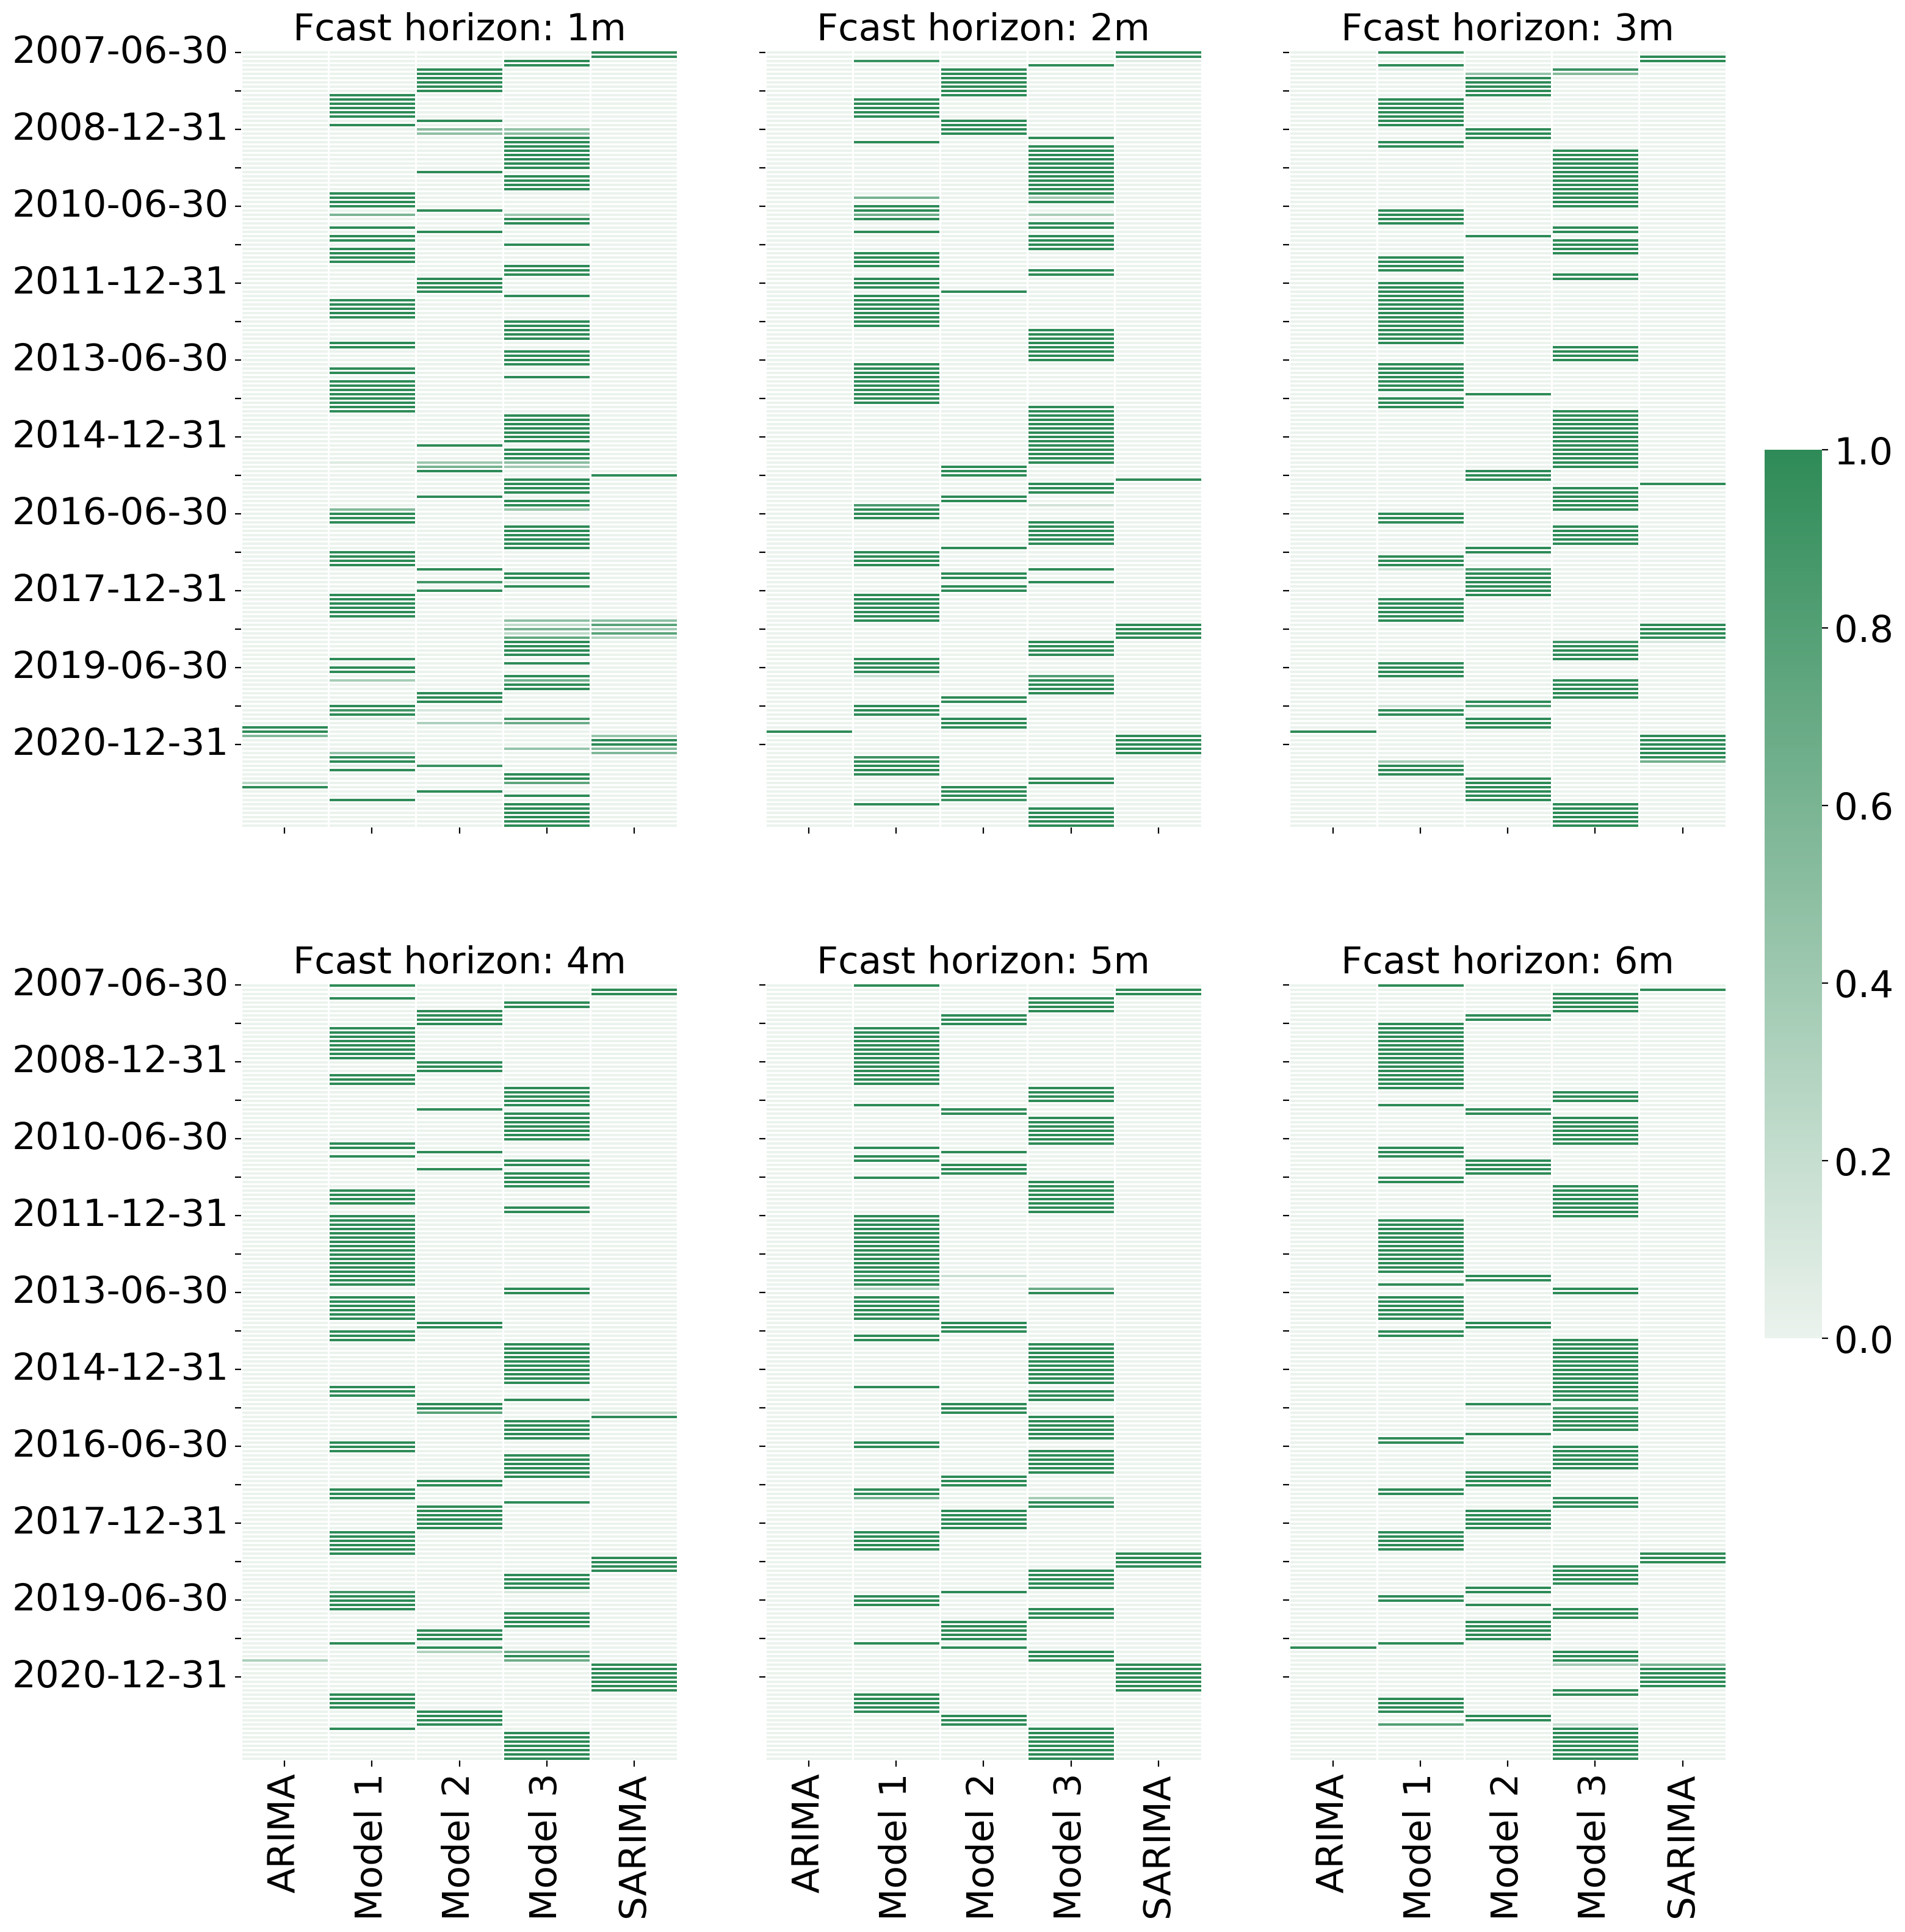

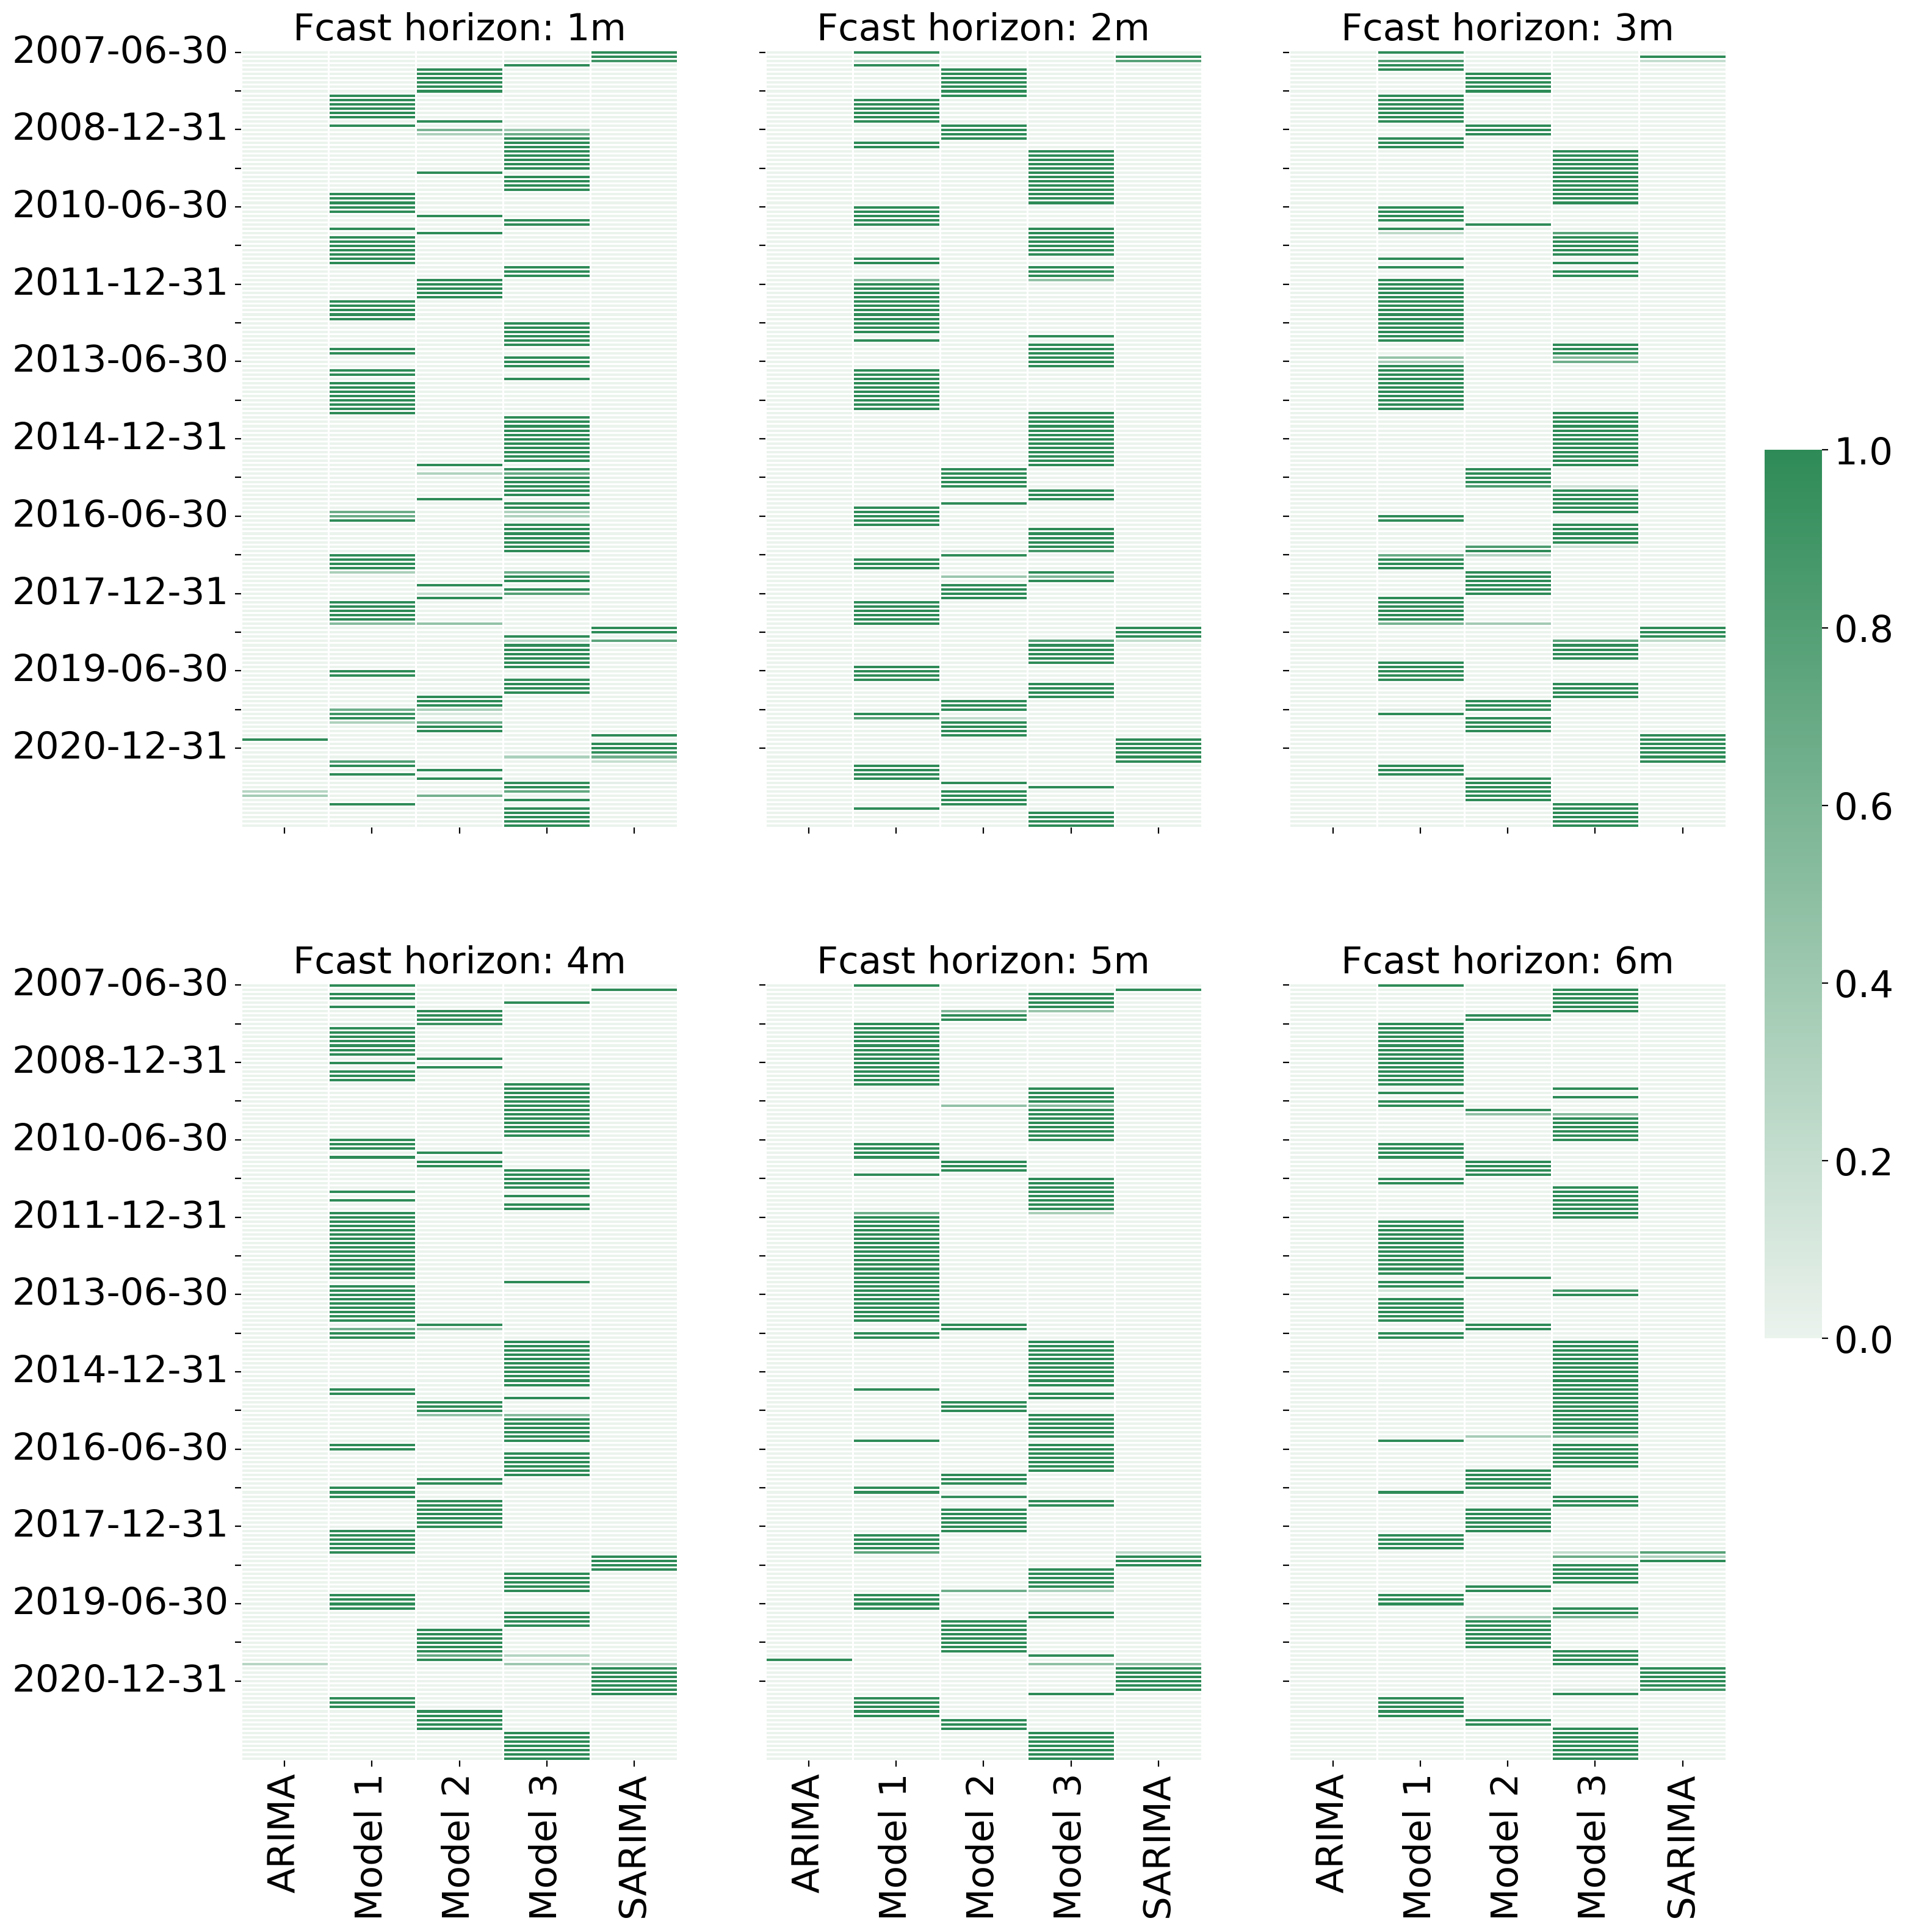

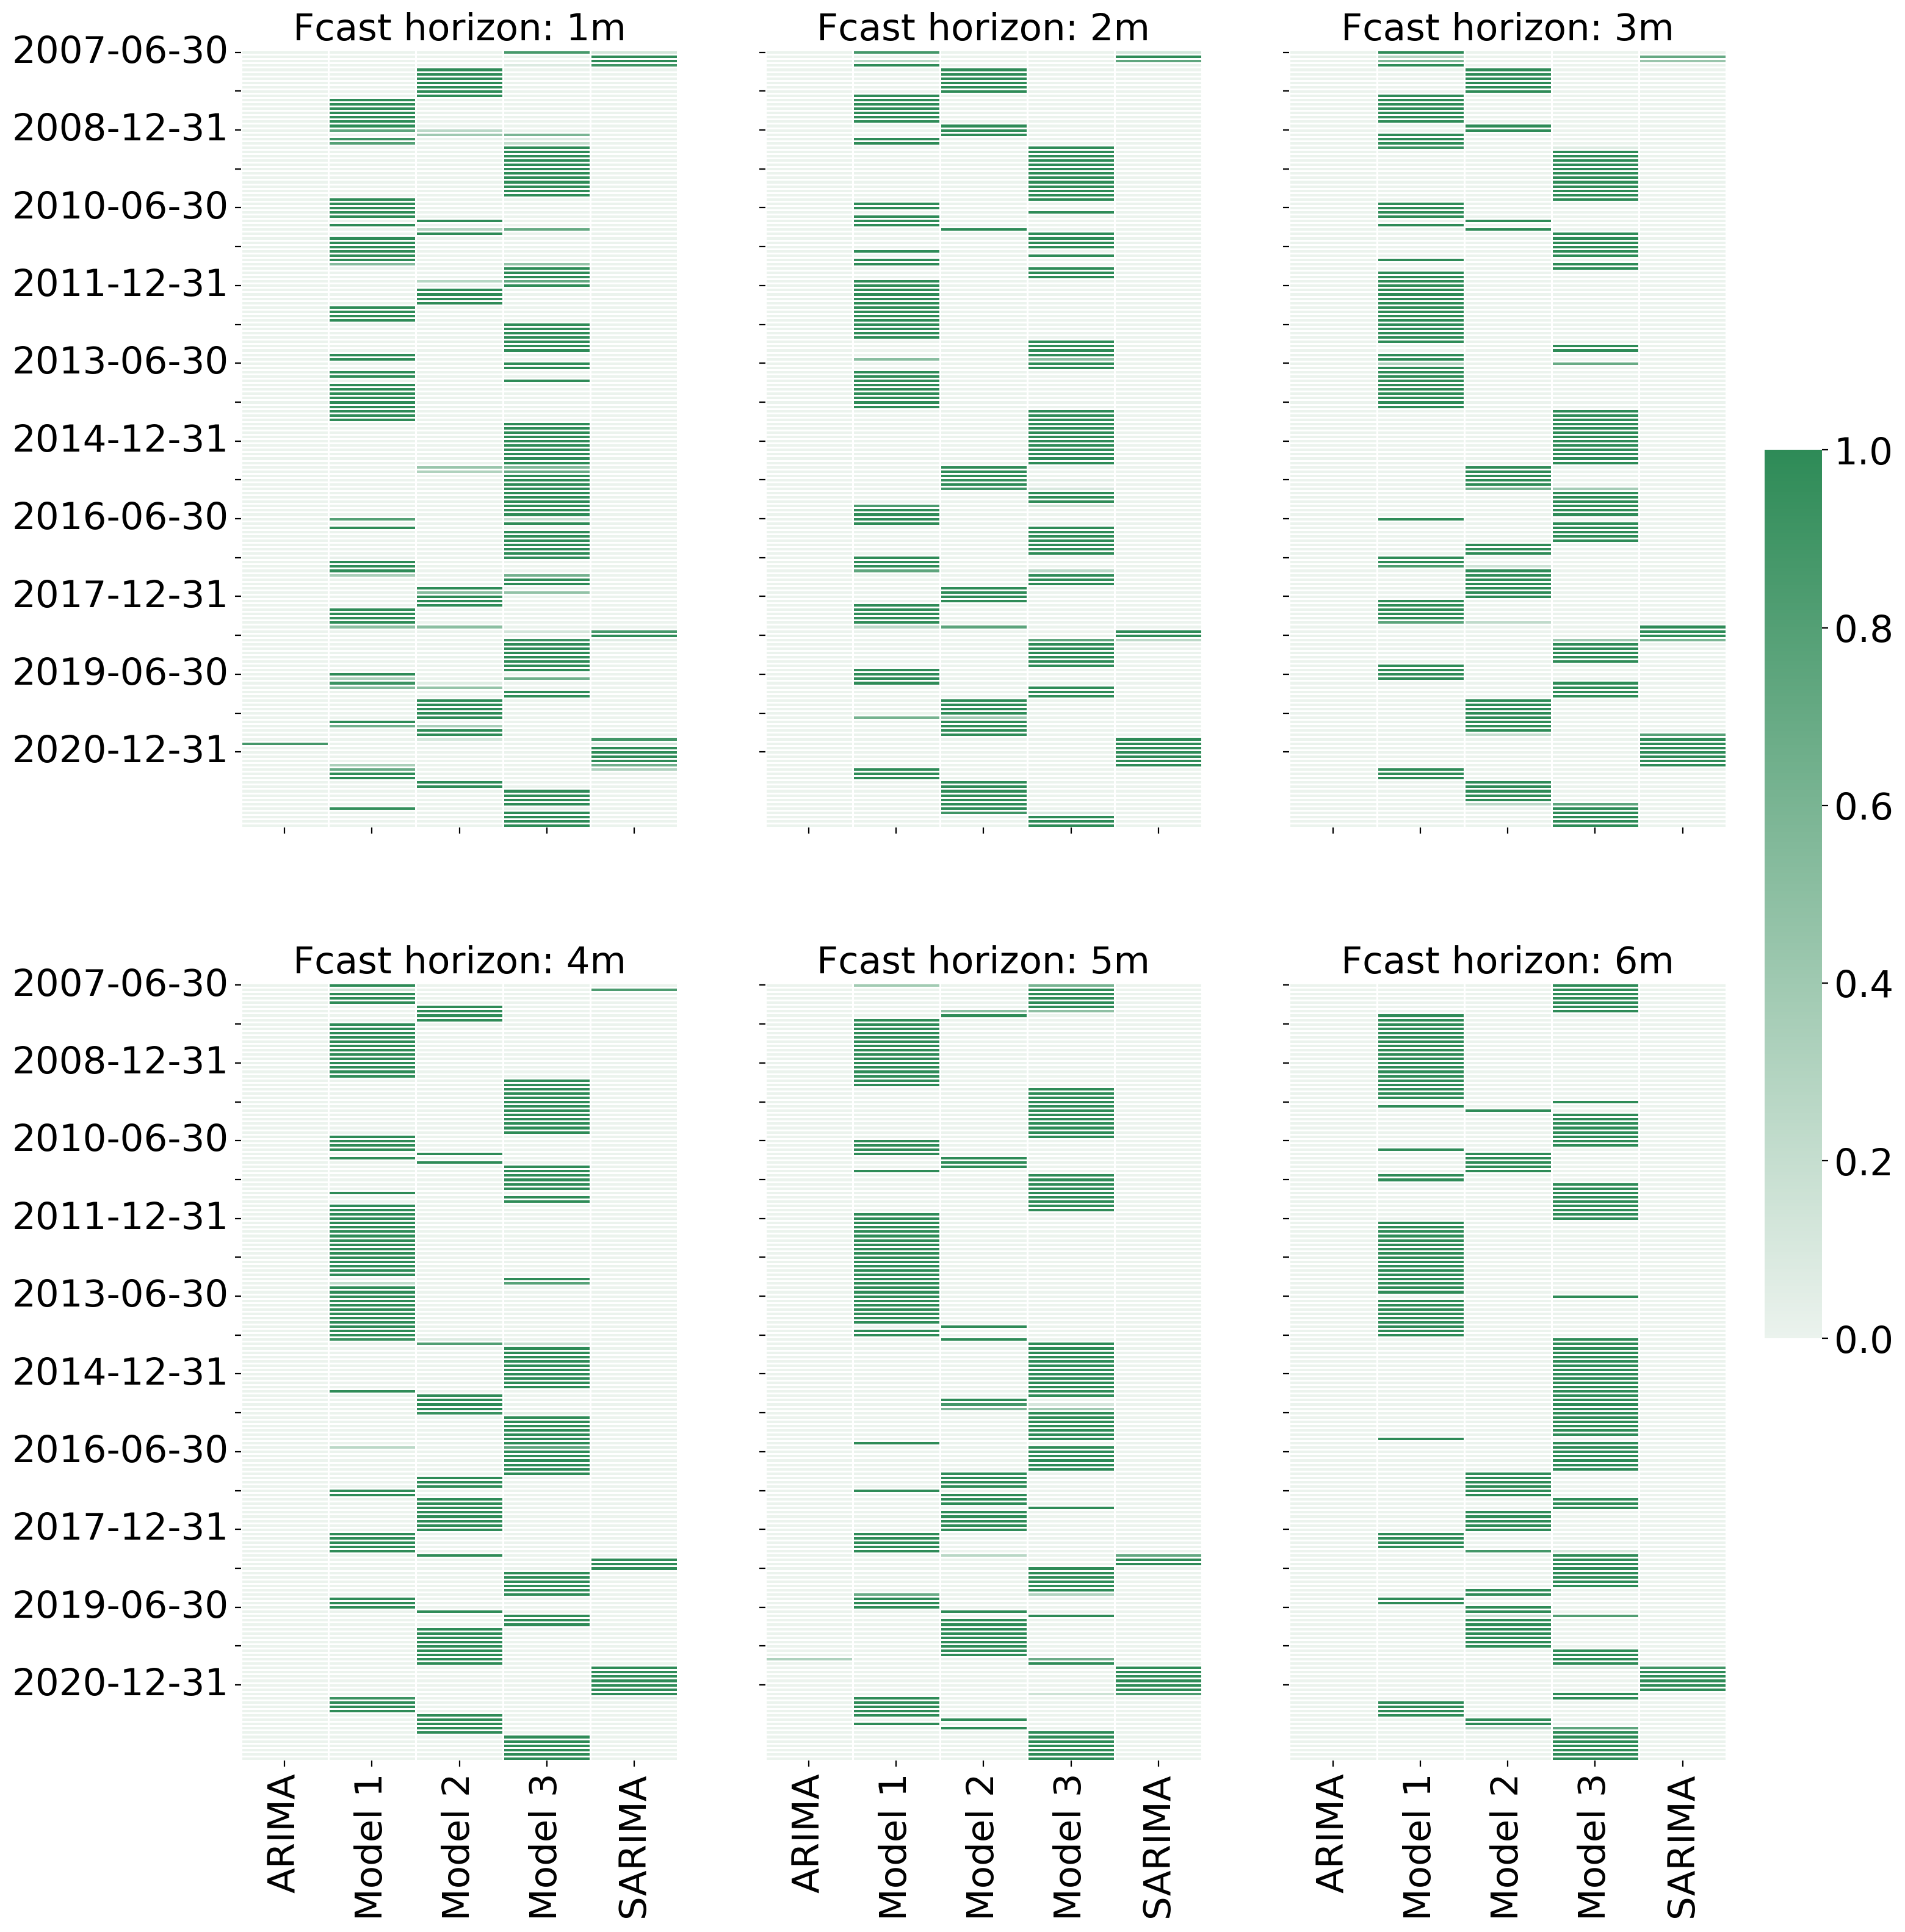

In [11]:

for K in past_points_use:
    fig, ax = plt.subplots(2, 3, figsize=(15.7, 18.2), sharex=True, sharey=True)
    cbar_ax = fig.add_axes([0.92, .3, .03, .4])
    for idx_axi, axi in enumerate(ax.flatten()):
        w_df    = weights_df[weights_df.forecast_window==forecast_horizon[idx_axi]]
        w_df    = w_df[w_df.past_months==K]

        w_hm_df = w_df.pivot(index='model_name_plt', columns='date_plot', values='weigth')

        if idx_axi==0:
            sns.heatmap(ax=axi, data=w_hm_df.T, cmap=cmap, vmin=0, vmax=1, linewidths=.5, cbar_ax=cbar_ax)
        else:
            sns.heatmap(ax=axi, data=w_hm_df.T, cmap=cmap, vmin=0, vmax=1, linewidths=.5, cbar_ax=None, cbar=None)
        axi.set_title("Fcast horizon: {}".format(forecast_horizon[idx_axi]))
        axi.set_xlabel(None)
        axi.set_ylabel(None)

        ytickpos  = [0.5, 9.5, 18.5, 27.5, 36.5, 45.5, 54.5, 63.5, 72.5, 81.5, 90.5, 99.5, 108.5, 117.5, 126.5, 135.5, 144.5, 153.5, 162.5]
        yticklabl = ['2007-06-30','','2008-12-31','','2010-06-30','','2011-12-31','','2013-06-30','','2014-12-31','','2016-06-30','','2017-12-31','','2019-06-30','','2020-12-31']
        axi.set_yticks(ytickpos)
        axi.set_yticklabels(yticklabl)

    fig.savefig(os.path.join(results_dir, "figures", "reviews", "ensemble", f"weigths_{K}_pastPerformance.png"), dpi=300, transparent=True)

